In [6]:
import pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [3]:
data = pd.read_csv("winequality_red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [7]:
data.shape

(1599, 12)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [11]:
X = data.drop(columns = 'quality')
y = data.quality

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X,y,
                                                test_size = 0.30, 
                                                random_state= 355)

In [13]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [15]:
feature_name = list(X.columns)
class_name = list(y_train.unique())
feature_name

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [16]:
clf.score(x_train, y_train)

1.0

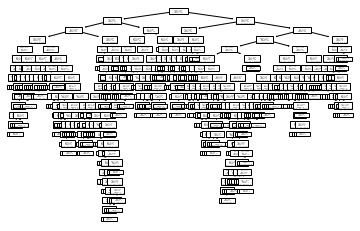

In [19]:
import matplotlib.pyplot as plt
tree.plot_tree(clf)
plt.show()

In [17]:
# create a dot_file which stores the tree structure
dot_data = tree.export_graphviz(clf, feature_names = feature_name, 
                            rounded = True, filled=True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())


InvocationException: GraphViz's executables not found

In [20]:
clf.score(x_train, y_train)

1.0

In [23]:
py_pred = clf.predict(x_test)

In [24]:
clf.score(x_test, y_test)

0.61875

In [25]:
scalar = StandardScaler()
x_transform = scalar.fit_transform(X)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x_transform, 
                                                    y,
                                                    test_size = 0.30,
                                                    random_state=355)

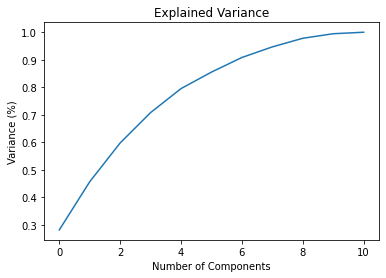

In [27]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [29]:
pca = PCA(n_components=8)
new_data = pca.fit_transform(x_transform)

principal_x = pd.DataFrame(new_data, 
                            columns = ['PC-1','PC-2','PC-3',
                                        'PC-4','PC-5','PC-6',
                                        'PC-7','PC-8'])   
principal_x 

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8
0,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392,0.929714,-1.009829,0.762587
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531,0.401473,-0.539553,0.597946
3,2.357673,-0.269976,0.243489,-0.928450,-1.499149,-0.131017,0.344290,-0.455375
4,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258
...,...,...,...,...,...,...,...,...
1594,-2.150500,0.814286,0.617063,0.407687,-0.240936,0.054835,0.170812,-0.355866
1595,-2.214496,0.893101,1.807402,0.414003,0.119592,-0.674711,-0.607970,-0.247640
1596,-1.456129,0.311746,1.124239,0.491877,0.193716,-0.506410,-0.231082,0.079382
1597,-2.270518,0.979791,0.627965,0.639770,0.067735,-0.860408,-0.321487,-0.468876


In [30]:
# let's see how well our model perform on this new data
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,
                                test_size = 0.30, random_state= 355)
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.5791666666666667